##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    <h1 style = "font-size:48px; font-weight:normal"><b>AI</b>-TECH</style></h1>
    <br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">Przykład 2 DO LABORATORIUM 1</style></h1>
    <h1 style = "font-size:24px">z GŁĘBOKIEGO PRZETWARZANIA TEKSTU I MOWY</style></h1>
    <h1 style = "font-size:24px">Sygnały cyfrowe, reprezentacje, parametryzacje</style></h1>
    <h1 style = "font-size:24px">Szymon Zaporowski</style></h1>
    <h3 style = "font-size:21px">Reprezentacje sygnałów fonicznych - przykłady</h3>
    <h3 style = 
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

![stopka.svg](stopka.svg)

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej" 
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

# 1. Przykład 2

W tym przykładzie skupiono się na rodzajach reprezentacji sygnałów fonicznych. 
Poniżej pokazano w jaki sposób z wykorzystaniem biblioteki librosa można uzyskać spektrogram oraz melcepstrogram sygnału audio.
Jak przykładowe sygnały posłużą nagrania mowy wykonane w Katedrze Systemów Multimedialnych w ramach rejestracji korpusu ELRA-based sentence recordings.

Aby poprawnie uruchomić przykłady należy załadować zawartość folderu "dane" do usługi Colab lub umieścić w folderze z notatnikiem zawierającym przykład. 

Najpierw dokonujemy załadowania bibliotek niezbędnych do uruchomienia ćwiczenia.

In [12]:
import os

import librosa
import librosa.display
import sklearn
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
% matplotlib inline
import os
% cd Zad1

C:\Projekty\GPTIM\LAB1


In [2]:
!pip install spafe

!pip install python_speech_features
!pip install pydub
import spafe
import pydub
import python_speech_features

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


You should consider upgrading via the 'C:\Projekty\GPTIM\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=4e8aaf06cad2b37c31ad115496366fc3096d5bd015097478477e211e1adf973e
  Stored in directory: C:\Users\kwiat\AppData\Local\Temp\pip-ephem-wheel-cache-h07jlpt8\wheels\09\a1\04\08e2688d2562d8f9ff89e77c6ddfbf7268e07dae1a6f22455e
Successfully built python-speech-features


You should consider upgrading via the 'C:\Projekty\GPTIM\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


You should consider upgrading via the 'C:\Projekty\GPTIM\venv\Scripts\python.exe -m pip install --upgrade pip' command.
C:\Projekty\GPTIM\venv\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Po imporcie i instalacji bibliotek czas na pokazanie sposobu liczenia pierwszej reprezentacji czyli spektrogramu melowego zwanego melspektrogramem. Do tego celu zostanie wykorzystana biblioteka librosa. Jak przykład sygnału audio posłuży nagranie z korpusu ELRA-based sentence recordings.

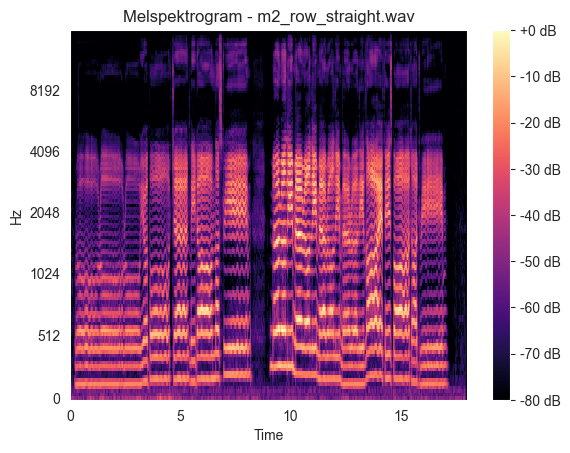

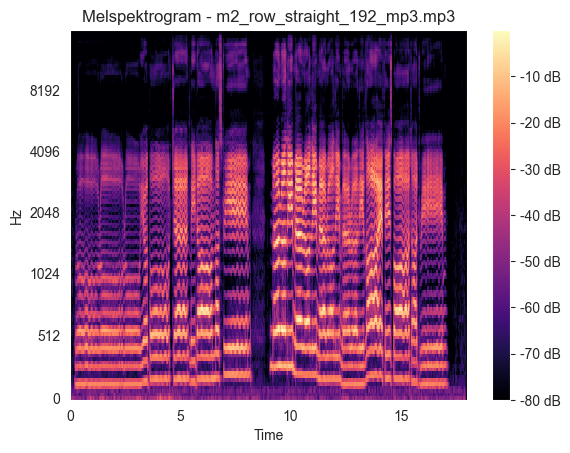

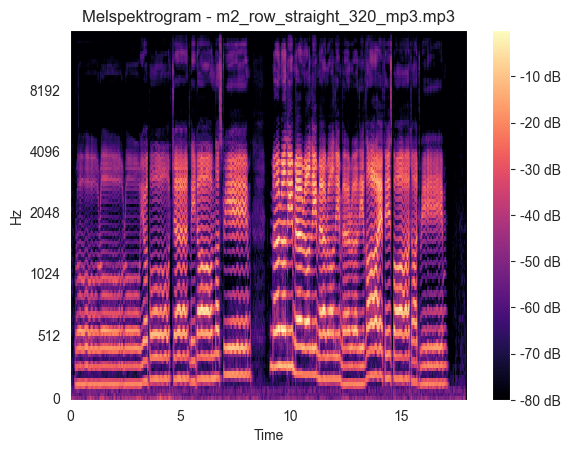

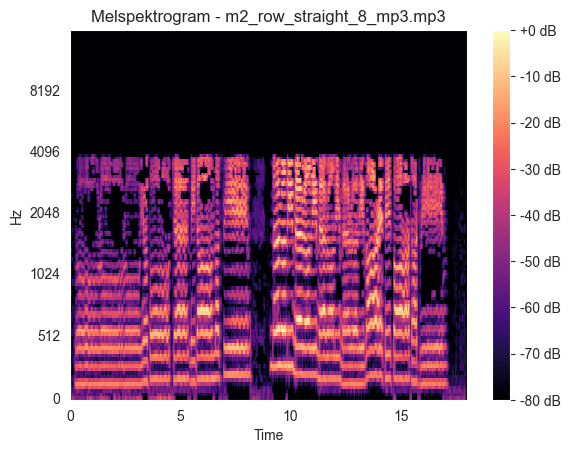

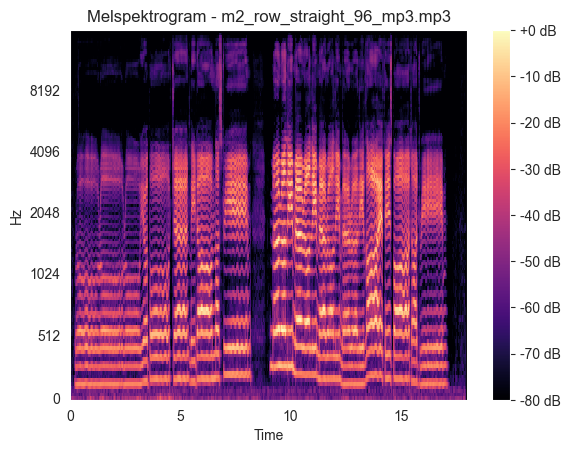

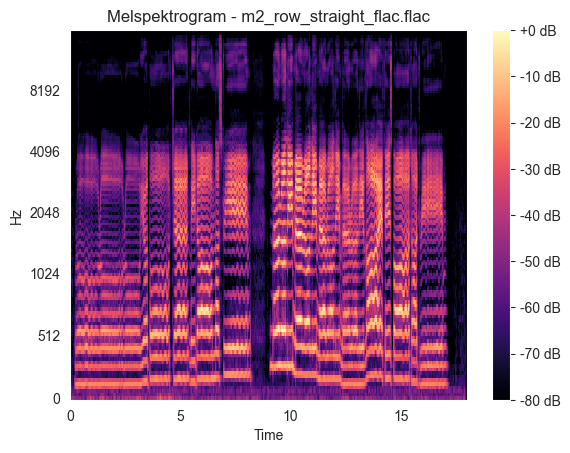

In [27]:
dir = "m2_row_straight"

for file in os.listdir(dir):
    signal, sample_rate = librosa.load(os.path.join(dir, file))
    signal = np.array(signal)
    signal, index = librosa.effects.trim(signal)
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sample_rate)
    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(mel_spec, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sample_rate, fmax=16000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title=f"Melspektrogram - {file}")

Otrzymany melspektrogram pokazuje w których momentach czasu w funkcji częstotliwości pojawia się dźwięk o natężeniu wyrażonym odpowiednim kolorem.

Przy użyciu bibliotek librosa możemy obliczyć również zwykły spektrogram. Znowu posłużymy się testowym nagraniem.

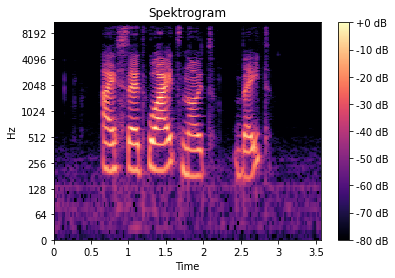

In [ ]:
signal, sample_rate = librosa.load("Speaker_6_001.wav")
S = np.abs(librosa.stft(signal))  # obliczanie stft, dalej wykorzystywana jest tylko część rzeczywista
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax)
ax.set_title('Spektrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

Za pomocą biblioteki librosa można również obliczyć reprezentację sygnału audio transformowanego z użyciem transformacji CQT. Jest to dosyć ciekawa transformacja, powiązana z transformacją Fouriera i transformacją falkową Gabora. Jej naistotniejszą cechą jest fakt iż naśladuje ludzki zmysł słuchu -  w rozdzielczości widmowej o niższej częstotliwości jest lepsza, podczas gdy czasowa rozdzielczość poprawia się przy wyższych częstotliwościach. Transformacja jest stosowania głównie do muzyki. W związku z tym wykorzystamy nagranie śpiewu.

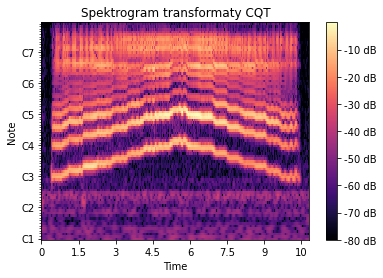

In [8]:
import matplotlib.pyplot as plt

signal, sample_rate = librosa.load("m2_scales_straight_e.wav")
C = np.abs(librosa.cqt(signal, sr=sample_rate))  # obliczanie transformaty CQT
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sample_rate, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Spektrogram transformaty CQT')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

Jak widać w górnym paśmie widmo się zlewa. Można temu zapobiec stosując dodatkowe parametry w funkcji librosa.cqt.

/usr/local/lib/python3.7/dist-packages/librosa/display.py:1336: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  "Frequency axis exceeds Nyquist. "


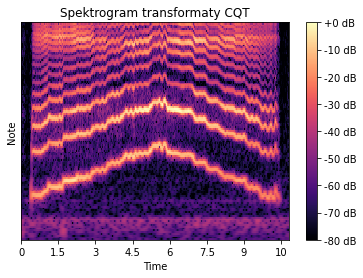

In [9]:
C = np.abs(librosa.cqt(signal, sr=sample_rate, fmin=librosa.note_to_hz('C2'),
                       n_bins=60 * 2,
                       bins_per_octave=12 * 2))  # n_bins odpowiada za podział na przedziały - liczba przedziałów, do tego zastosowano 24 przedziały na oktawę
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sample_rate, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Spektrogram transformaty CQT')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

Wykorzystując bibliotekę spafe można w łatwy sposób uzyskać spektrogram

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


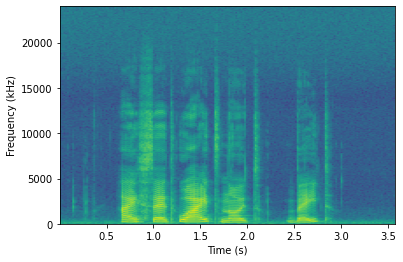

In [11]:
import scipy
from spafe.utils import vis
from scipy.io import wavfile
import scipy.io

sample_rate, signal = scipy.io.wavfile.read("Speaker_6_001.wav")


def spectogram(sig, fs):
    """
    visualize a the spectogram of the given mono signal.

    Args:
        sig (array) : a mono audio signal (Nx1) from which to compute features.
        fs    (int) : the sampling frequency of the signal we are working with.
    """
    plt.specgram(sig, NFFT=1024, Fs=fs)
    plt.ylabel("Frequency (kHz)")
    plt.xlabel("Time (s)")
    plt.show(block=False)
    plt.close()


# Tworzenie spektrogramu
spectogram(signal, sample_rate)


<p><b>Zadanie 1</b></p>

Wykorzystując wybrane pliki z ćw. 1. i przykłady z notatnika obliczyć reprezentacje sygnałów i porównać je ze sobą  policzone dla plików z tą samą zawartością (mowa, muzyka, śpiew).
Opisać zaobserwowane różnice. Z czego mogą wynikać? Która reprezentacja najlepiej nadaje się dla danego typu zawartości?

<p><b>Zadanie 2</b></p>
Która z reprezentacji wydaje się być najbardziej przejrzysta i łatwa do odczytania dla człowieka, a która dla komputera? Uzasadnij odpowiedź na podstawie laboratorium.

